**Import the required libraries**
____________________________________________

In [193]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

**Loading the dataset**
____________________________________________

In [195]:
data = pd.read_csv("SeoulBikeData.csv")

Return top 5  rows of a data frame

In [196]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Get statistical information**
______________________________

Generate descriptive statistics by calling the describe() method on our dataset

In [197]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


As we see below at the moment we have an understanding about our data types:Object, int64, float64

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

Return a scalar value which is the count of all the unique values in the Index

In [199]:
data.apply(lambda x: len(x.unique()))

Date                         365
Rented Bike Count           2166
Hour                          24
Temperature(C)               546
Humidity(%)                   90
Wind speed (m/s)              65
Visibility (10m)            1789
Dew point temperature(C)     556
Solar Radiation (MJ/m2)      345
Rainfall(mm)                  61
Snowfall (cm)                 51
Seasons                        4
Holiday                        2
Functioning Day                2
dtype: int64

**Preprocessing the dataset**
________________________________________________________________________________

Every time we have data with dates, we need to convert them to the proper form

In [200]:
from datetime import datetime
data['Date'] = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [201]:
data["Month"]=pd.DatetimeIndex(data['Date']).month
data["Year"]=pd.DatetimeIndex(data['Date']).year
data["tday"]=pd.DatetimeIndex(data['Date']).day

Identifing missing Values

In [202]:
miss_val = data.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Month                       0
Year                        0
tday                        0
dtype: int64

In [203]:
df=data.select_dtypes(include='object')
print("Categorical Values:", df.head())

Categorical Values:   Seasons     Holiday Functioning Day
0  Winter  No Holiday             Yes
1  Winter  No Holiday             Yes
2  Winter  No Holiday             Yes
3  Winter  No Holiday             Yes
4  Winter  No Holiday             Yes


Create dummies of categorical features. It is a way to include nominal variables in a regression model. In other words variables need to be converted it into a number.

In [204]:
df1=data
for m in df:
  dummies =pd.get_dummies(data[m],drop_first=True)
  df1 = pd.concat([df1,dummies],axis='columns')

**Exploratory Data Analysis**
____________________________________________

[Text(0.5, 1.0, 'Count of bikes during season')]

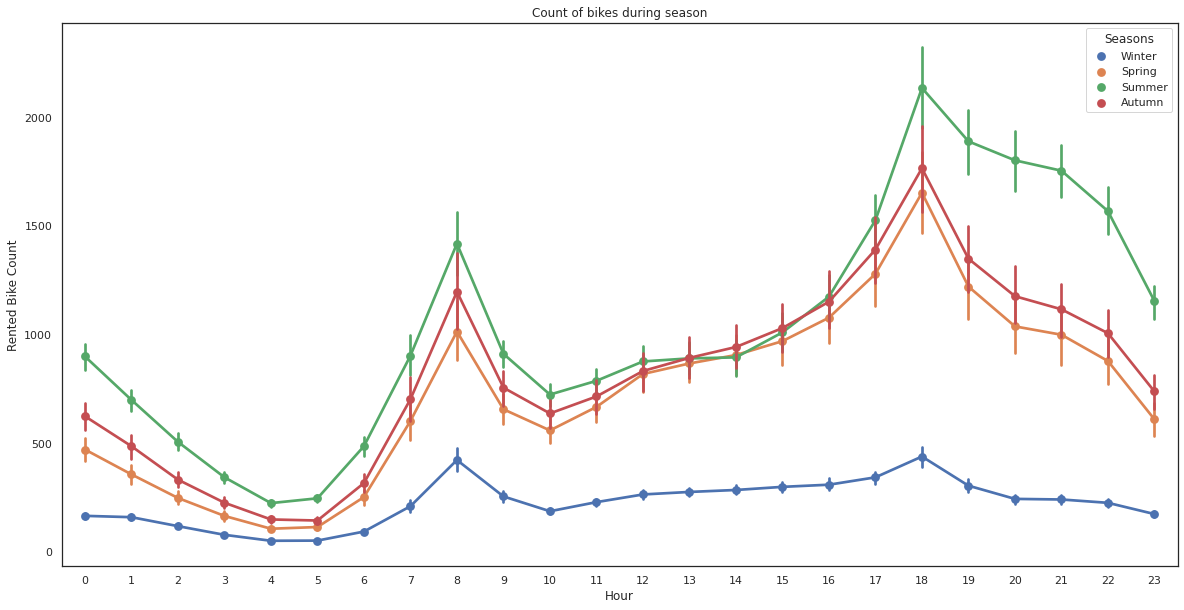

In [205]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='Hour', y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Count of bikes during season')

Note above, we have set three parameters. The number of rented bicycles on the Y-axis. Hour on the X-axis. And also the third parameter is the season. This can tell us about the dependence of bike rental and the season, as well as the time during the day.

[Text(0.5, 1.0, 'Count of bikes during day')]

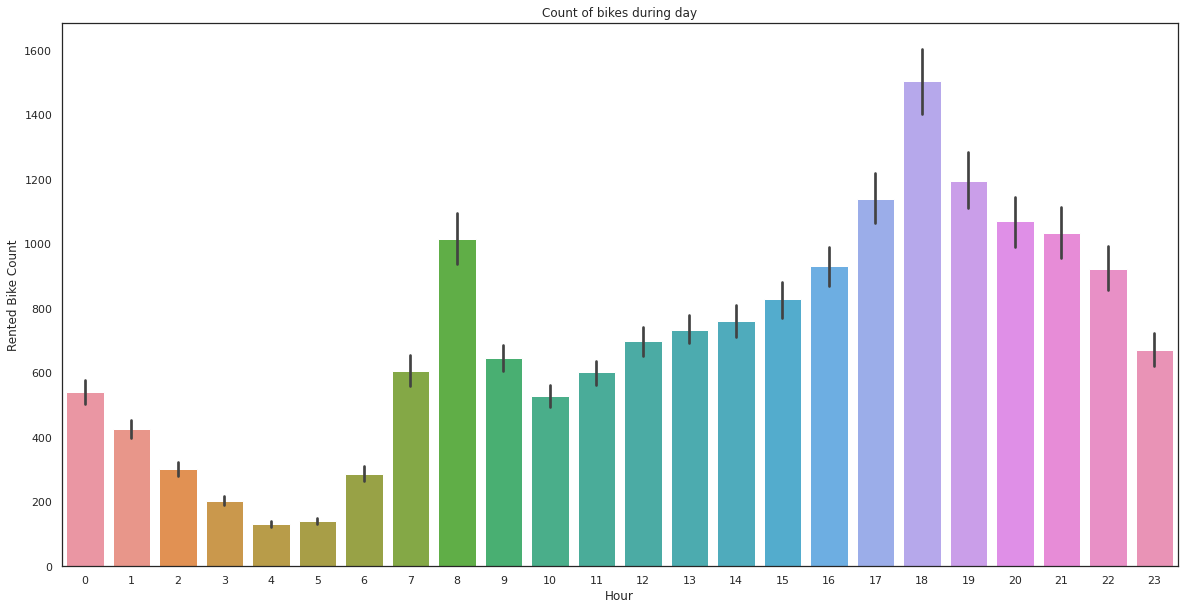

In [206]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x='Hour', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during day')

We can see above a clearer relationship between the time of day and the number of rented bicycles

[Text(0.5, 1.0, 'Relation between humidity and users')]

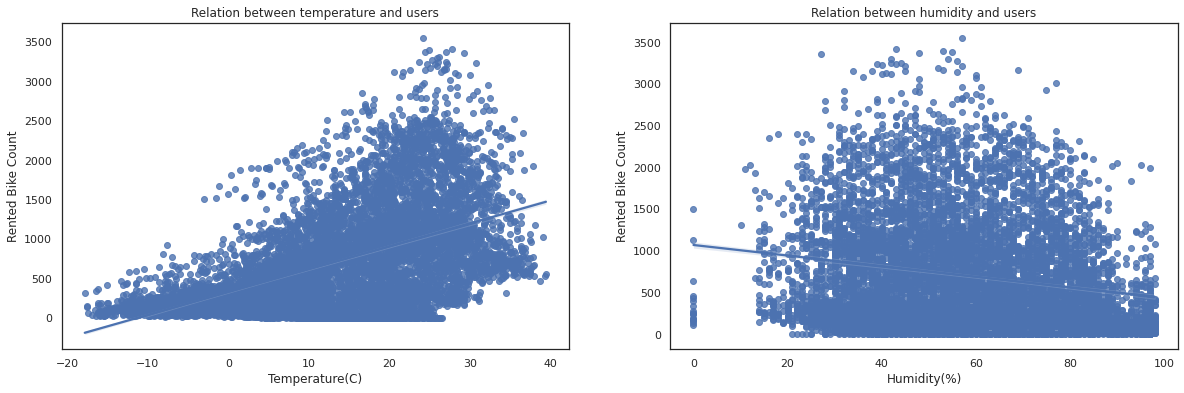

In [207]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,6))
sns.regplot(x=data['Temperature(C)'], y=data['Rented Bike Count'], ax=ax1)
ax1.set(title='Relation between temperature and users')
sns.regplot(x=data['Humidity(%)'], y=data['Rented Bike Count'], ax=ax2)
ax2.set(title='Relation between humidity and users')

In the plots above, you can see a clear correlation with changes in temperature or increasing humidity. We will look at this in more detail in the following charts.

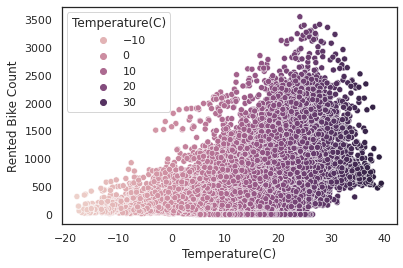

In [208]:
sns.scatterplot(x="Temperature(C)", y="Rented Bike Count", hue='Temperature(C)', data=data)

We can see that as the temperature increases, the rental count usually increases. When the temperature gets too hot over 30 degrees (C) the number of rentals starts to decline

[Text(0.5, 1.0, 'Theoretical quantiles')]

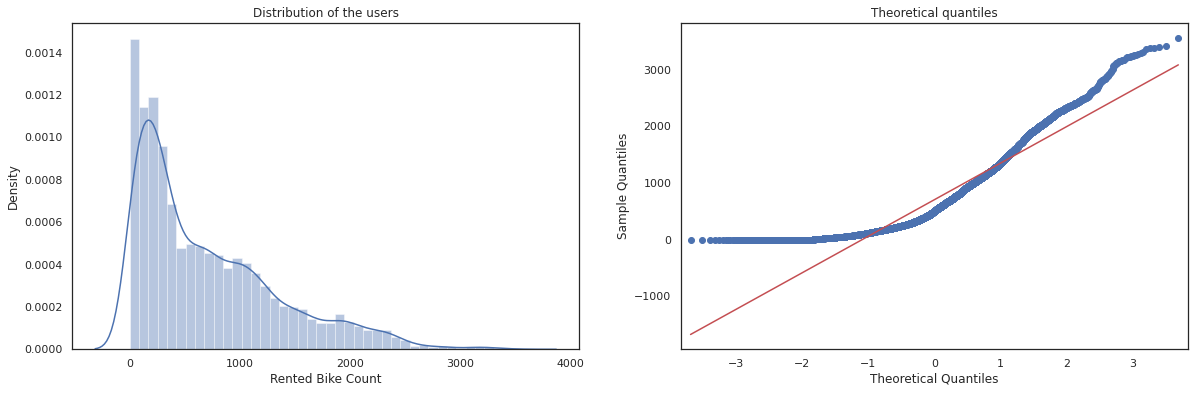

In [209]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set(title='Distribution of the users')
sns.distplot(data['Rented Bike Count'], ax=ax1)
qqplot(data['Rented Bike Count'], ax=ax2, line='s')
ax2.set(title='Theoretical quantiles')

The first graph can show us a huge difference in numerical values ​​from 0 to 4000. In the second graph, we see that most of the values ​​are 0. The data is assumed to be normal. We can log data using the log() function, but before that we need to continue exporting the data. 
________________________________________________________________________________

An important way to examine data is using box plot. Which will point us to the presence of outilers.

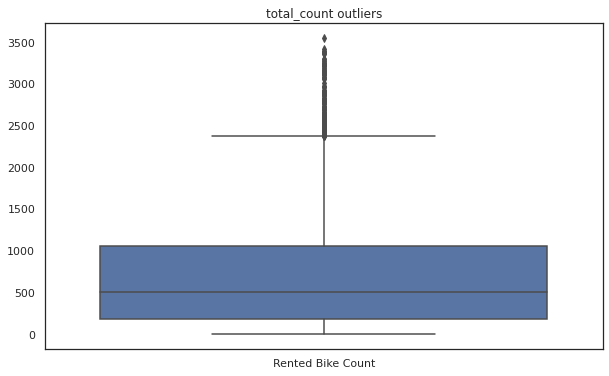

In [210]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=data[['Rented Bike Count']])
ax.set_title('total_count outliers')
plt.show()

We can see abnormal number of outliers. Let's examine other columns for a bigger picture

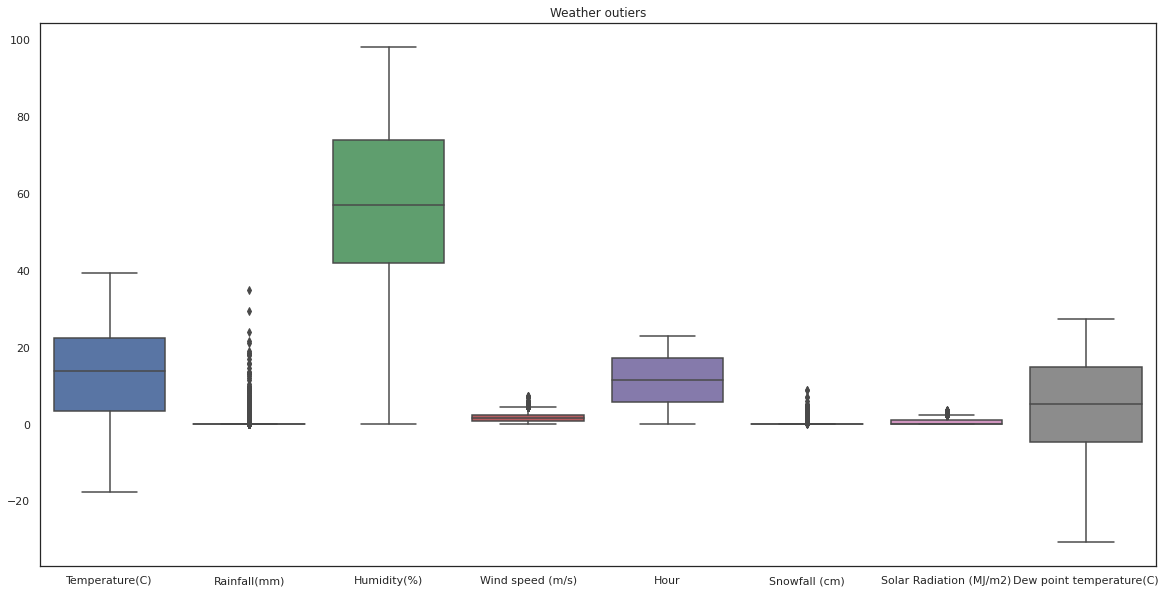

In [211]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=data[['Temperature(C)', 'Rainfall(mm)', 'Humidity(%)', 'Wind speed (m/s)', 'Hour', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)', 'Dew point temperature(C)']])
ax.set_title('Weather outiers')
plt.show()

Let's take a closer look at box plots with an explicit number of outliers

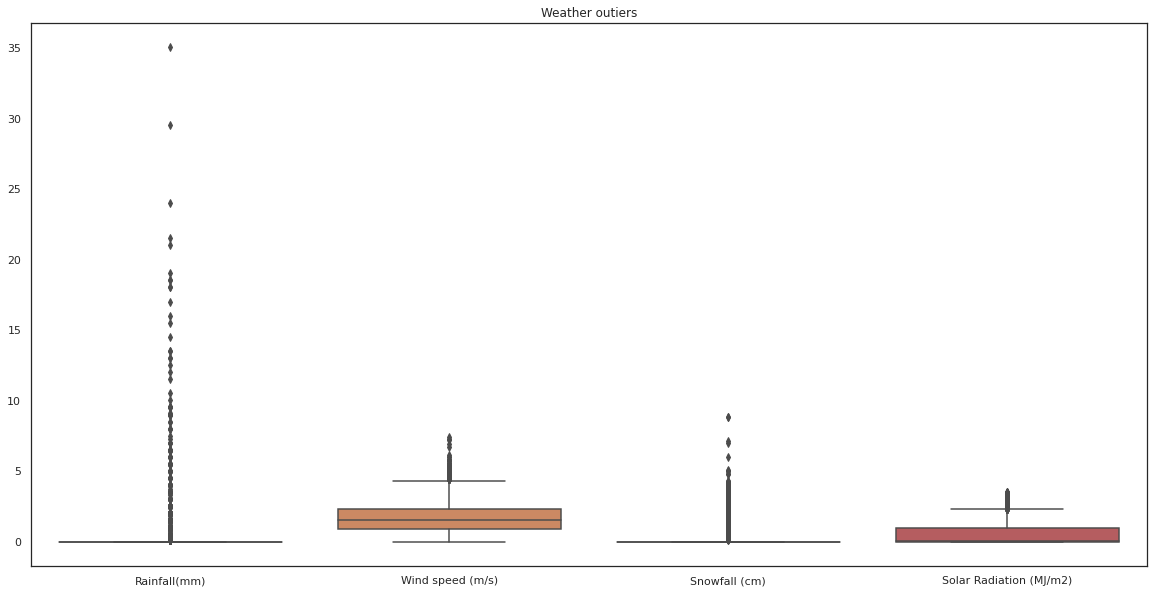

In [212]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=data[['Rainfall(mm)', 'Wind speed (m/s)', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)']])
ax.set_title('Weather outiers')
plt.show()

With rainfall and snowfall, we obviously cannot fix the situation due to the lack of construction. But we can correct rented bike count, wind speed and solar radiation data. 

**Plotting the coorelation matrix**

In [213]:
data_corr = data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,tday
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,0.215162,4.684885e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.684858e-18,0.000000,1.598551e-19
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,0.377796,8.090791e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,0.035925,7.047359e-03
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-0.003781,-6.123440e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,0.052381,-1.068595e-01
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,0.336350,6.970777e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,0.128086,-3.445555e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,0.027522,1.199827e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-0.206418,1.014355e-01


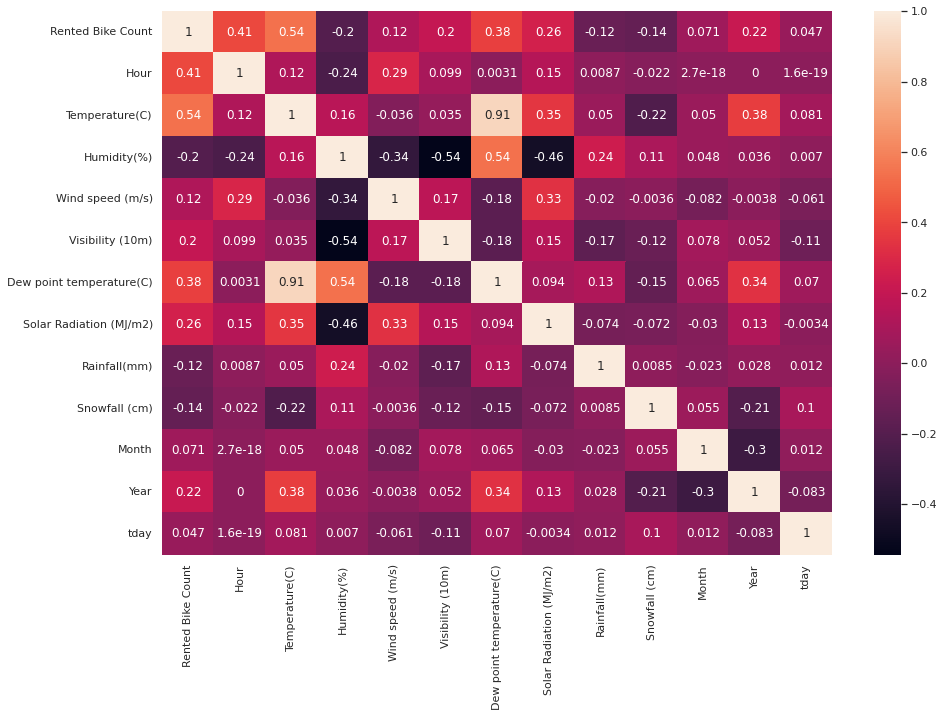

In [214]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_corr, annot=True)
plt.show()

We can see all numerical data and target variable are highly impacting. The “target variable” is the variable whose values are to be modeled and predicted by other variables. In other words it is analogous to the dependent variable
_________________________________________________________________________

**After visualizing the data, we start working on preparing it for linear regression**

We saw earlier that we need to change data with outliers in rented bike count, windspeed and solar radiation columns

In [215]:
#cols = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rented Bike Count']

#for col in cols:
    #data[col] = data[col].astype('category')

#data.info()

In [216]:
df1.rename(columns = {'Rented Bike Count':'Count'}, inplace = True)

In [217]:
Q1 = np.percentile(df1['Count'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1['Count'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1['Count'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1120.75
upper limit: 2377.25


In [218]:
df2 = df1[df1.Count < up_lim]
df2=df2[df2.Count > low_lim]

In [219]:
df2.rename(columns = {'Wind speed (m/s)':'Wind'}, inplace = True)

In [220]:
Q1 = np.percentile(df2['Wind'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df2['Wind'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df2['Wind'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [221]:
df2=df2[df2.Wind<up_lim]
df2=df2[df2.Wind>low_lim]

In [222]:
df2.rename(columns = {'Solar Radiation (MJ/m2)':'Rad'}, inplace = True)

In [223]:
Q1 = np.percentile(df2['Rad'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df2['Rad'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df2['Rad'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [224]:
df2 = df2[df2.Rad< up_lim]
df2 = df2[df2.Rad>low_lim]

In [225]:
df1=df2

In [226]:
df1=df1.drop(['Date','Seasons','Holiday','Functioning Day','Rainfall(mm)'],axis=1)

Assigning x and y from two dataframes

In [228]:
X = df1
y = df2['Count']

Importing the required modules to prepare for model 

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

Splitting the data into training and testing 

In [230]:
train, test=train_test_split(df1, test_size=0.2)

In [231]:
#X_train=train.drop(['Rented Bike Count'], axis=1)
#y_train=train['Rented Bike Count']
#X_test=test.drop(['Rented Bike Count'], axis=1)
#y_test=test['Rented Bike Count']

In [232]:
X_train=train.drop(['Count'],axis=1)
y_train=train['Count']
X_test=test.drop(['Count'],axis=1)
y_test=test['Count']

Fitting into a model

In [233]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [234]:
y_pred=lr.predict(X_test)
y_pred

array([1164.29903226,  736.12017699,  648.47177179, ...,  508.93570338,
        455.4636546 ,  549.14562464])

y_pred is the data predicted (calculated, output) by your model

To evaluate how well our model performed, we'll look at three metrics:

MAE: the average of all absolute errors.
MSE: takes the distance of all points from the regression line (residuals) and returns the squared average.
RMSE: the standard deviation of the residuals.

In [235]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 297.98804380605037
Mean Squared Error: 154934.3990522811
Root Mean Squared Error: 393.61707159659767


In [236]:
print('Accuracy', lr.score(X_test, y_test))

Accuracy 0.5619863212678027


It could have been more accurate if:

We had more data.
Our data had a more "linear" relationship.
We had features that had a higher correlation to the label.

In [237]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.56


**Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes. A model that is overfitted matches the data too closely**
